In [97]:
import spacy
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

from sklearn.metrics import silhouette_score

# Fixing fonts:
plt.rcParams["font.family"] = "Times New Roman"

## repeated printouts and wide-format text:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None)

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Download spaCy model if not already installed
try:
    nlp = spacy.load("en_core_web_md")
except OSError:
    print("Downloading spaCy model...")
    !python -m spacy download en_core_web_md
    nlp = spacy.load("en_core_web_md")

[nltk_data] Downloading package stopwords to C:\Users\Sanha
[nltk_data]     Tahir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to C:\Users\Sanha
[nltk_data]     Tahir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
def process_text(input_text):
    # Tokenize the input text
    input_text = input_text.split(":")[1:]

    input_text = ' '.join(input_text)
    
    tokens = word_tokenize(input_text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Remove non-alphabetic characters
    tokens = [word for word in tokens if word.isalpha()]

    # Remove words of length less than 3
    tokens = [word for word in tokens if len(word) >= 3]

    tokens = list(set(tokens))

    # Join the processed tokens back into a string
    processed_text = ' '.join(tokens)

    return processed_text


def embeddings(sup_text): 

    doc = nlp(sup_text)

    # Extract word embeddings for each token
    word_embeddings = [token.vector for token in doc]

    # Convert word embeddings to a NumPy array
    X = np.array(word_embeddings)

    return X

# # Example usage
# input_string = "This is an example sentence with some stopwords and punctuation!"
# processed_string = process_text(input_string)
# print("Original text:", input_string)
# print("Processed text:", processed_string)


In [79]:
lobbying_data = pd.read_csv("complete_bills_info2.csv")
# len(lobbying_data)
# len(pd.unique(lobbying_data.Organization))
lobbying_data.shape
lobbying_data = lobbying_data[["Bill_Title", "Organization", "issue_text_len", "classif", "policy_area", "main_boi_party"]]
lobbying_data.head(n = 5)

# cluster_df = lobbying_data.groupby('Organization').agg({'Bill_Title': ' '.join, 
#                                                         'policy_area': 'nunique'}).reset_index()

(18166, 104)

,Bill_Title,Organization,issue_text_len,classif,policy_area,main_boi_party
0,H.Con.Res.10: Expressing the sense of Congress...,PharmaEssentia Corp,127.0,HCONRES,International Affairs,R
1,H.Con.Res.12: Expressing the sense of Congress...,American Sugar Alliance,228.0,HCONRES,Foreign Trade and International Finance,R
2,H.Con.Res.13: Supporting the Local Radio Freed...,iHeartMedia Inc,843.0,HCONRES,"Science, Technology, Communications",R
3,H.Con.Res.13: Supporting the Local Radio Freed...,National Assn of Broadcasters,735.0,HCONRES,"Science, Technology, Communications",R
4,H.Con.Res.13: Supporting the Local Radio Freed...,Recording Industry Assn of America,194.0,HCONRES,"Science, Technology, Communications",R


In [80]:
one_hot_encoded_1 = pd.get_dummies(lobbying_data['classif'])
one_hot_encoded_2 = pd.get_dummies(lobbying_data['main_boi_party'], prefix = "Sponsor")
lobbying_data['policy_area'] = [x.replace(' ', '_').replace("'", '').replace(',', '') for x in lobbying_data['policy_area']]
one_hot_encoded_3 = pd.get_dummies(lobbying_data['policy_area'], prefix = "policy_area")

df_encoded = pd.concat([lobbying_data[["Organization", "issue_text_len"]], one_hot_encoded_1, one_hot_encoded_2, one_hot_encoded_3], axis=1)
df_encoded.head()


,Organization,issue_text_len,HCONRES,HJRES,HR,HRES,S,SCONRES,SJRES,SRES,Sponsor_D,Sponsor_I,Sponsor_R,policy_area_Agriculture_and_Food,policy_area_Animals,policy_area_Armed_Forces_and_National_Security,policy_area_Arts_Culture_Religion,policy_area_Civil_Rights_and_Liberties_Minority_Issues,policy_area_Commerce,policy_area_Congress,policy_area_Crime_and_Law_Enforcement,policy_area_Economics_and_Public_Finance,policy_area_Education,policy_area_Emergency_Management,policy_area_Energy,policy_area_Environmental_Protection,policy_area_Families,policy_area_Finance_and_Financial_Sector,policy_area_Foreign_Trade_and_International_Finance,policy_area_Government_Operations_and_Politics,policy_area_Health,policy_area_Housing_and_Community_Development,policy_area_Immigration,policy_area_International_Affairs,policy_area_Labor_and_Employment,policy_area_Law,policy_area_Native_Americans,policy_area_Public_Lands_and_Natural_Resources,policy_area_Science_Technology_Communications,policy_area_Social_Sciences_and_History,policy_area_Social_Welfare,policy_area_Sports_and_Recreation,policy_area_Taxation,policy_area_Transportation_and_Public_Works,policy_area_Water_Resources_Development,policy_area_policyArea
0,PharmaEssentia Corp,127.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,American Sugar Alliance,228.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,iHeartMedia Inc,843.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,National Assn of Broadcasters,735.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Recording Industry Assn of America,194.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [81]:

clustering_by_firm_df = df_encoded.groupby('Organization').agg({'issue_text_len' : 'sum',
'HCONRES' : 'sum',
'HJRES' : 'sum',
'HR' : 'sum',
'S' : 'sum',
'SRES' : 'sum',
'Sponsor_D' : 'sum',
'Sponsor_I' : 'sum',
'Sponsor_R' : 'sum',
'policy_area_Agriculture_and_Food' : 'sum',
'policy_area_Animals' : 'sum',
'policy_area_Armed_Forces_and_National_Security' : 'sum',
'policy_area_Arts_Culture_Religion' : 'sum',
'policy_area_Civil_Rights_and_Liberties_Minority_Issues' : 'sum',
'policy_area_Commerce' : 'sum',
'policy_area_Congress' : 'sum',
'policy_area_Crime_and_Law_Enforcement' : 'sum',
'policy_area_Economics_and_Public_Finance' : 'sum',
'policy_area_Education' : 'sum',
'policy_area_Emergency_Management' : 'sum',
'policy_area_Energy' : 'sum',
'policy_area_Environmental_Protection' : 'sum',
'policy_area_Families' : 'sum',
'policy_area_Finance_and_Financial_Sector' : 'sum',
'policy_area_Foreign_Trade_and_International_Finance' : 'sum',
'policy_area_Government_Operations_and_Politics' : 'sum',
'policy_area_Health' : 'sum',
'policy_area_Housing_and_Community_Development' : 'sum',
'policy_area_Immigration' : 'sum',
'policy_area_International_Affairs' : 'sum',
'policy_area_Labor_and_Employment' : 'sum',
'policy_area_Law' : 'sum',
'policy_area_Native_Americans' : 'sum',
'policy_area_Public_Lands_and_Natural_Resources' : 'sum',
'policy_area_Science_Technology_Communications' : 'sum',
'policy_area_Social_Welfare' : 'sum',
'policy_area_Sports_and_Recreation' : 'sum',
'policy_area_Taxation' : 'sum',
'policy_area_Transportation_and_Public_Works' : 'sum',
'policy_area_Water_Resources_Development' : 'sum',
'policy_area_policyArea' : 'sum'}).reset_index()

clustering_by_firm_df.head()


,Organization,issue_text_len,HCONRES,HJRES,HR,S,SRES,Sponsor_D,Sponsor_I,Sponsor_R,policy_area_Agriculture_and_Food,policy_area_Animals,policy_area_Armed_Forces_and_National_Security,policy_area_Arts_Culture_Religion,policy_area_Civil_Rights_and_Liberties_Minority_Issues,policy_area_Commerce,policy_area_Congress,policy_area_Crime_and_Law_Enforcement,policy_area_Economics_and_Public_Finance,policy_area_Education,policy_area_Emergency_Management,policy_area_Energy,policy_area_Environmental_Protection,policy_area_Families,policy_area_Finance_and_Financial_Sector,policy_area_Foreign_Trade_and_International_Finance,policy_area_Government_Operations_and_Politics,policy_area_Health,policy_area_Housing_and_Community_Development,policy_area_Immigration,policy_area_International_Affairs,policy_area_Labor_and_Employment,policy_area_Law,policy_area_Native_Americans,policy_area_Public_Lands_and_Natural_Resources,policy_area_Science_Technology_Communications,policy_area_Social_Welfare,policy_area_Sports_and_Recreation,policy_area_Taxation,policy_area_Transportation_and_Public_Works,policy_area_Water_Resources_Development,policy_area_policyArea
0,1890 Universities Foundation,198.0,0,0,2,1,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21st Century School Fund,24.0,0,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,23andMe Inc,33.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,340B Health,275.0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60 Plus Assn,275.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
# Adding funding data: 

# Adding funds data: 

funds = pd.read_csv("lobbying_and_their_funds.csv" ,index_col=None)
funds["funds_int"] = [int(x.replace("$", "").replace(",", "")) for x in funds["Total"]]
funds = funds.groupby("Company").agg({"funds_int" : "sum"}).reset_index()
len(pd.unique(funds.Company))
clustering_by_firm_df = pd.merge(clustering_by_firm_df, funds[['Company', 'funds_int']], right_on ='Company', left_on = "Organization", how='left')


624

In [84]:
clustering_by_firm_df.head()

,Organization,issue_text_len,HCONRES,HJRES,HR,S,SRES,Sponsor_D,Sponsor_I,Sponsor_R,policy_area_Agriculture_and_Food,policy_area_Animals,policy_area_Armed_Forces_and_National_Security,policy_area_Arts_Culture_Religion,policy_area_Civil_Rights_and_Liberties_Minority_Issues,policy_area_Commerce,policy_area_Congress,policy_area_Crime_and_Law_Enforcement,policy_area_Economics_and_Public_Finance,policy_area_Education,policy_area_Emergency_Management,policy_area_Energy,policy_area_Environmental_Protection,policy_area_Families,policy_area_Finance_and_Financial_Sector,policy_area_Foreign_Trade_and_International_Finance,policy_area_Government_Operations_and_Politics,policy_area_Health,policy_area_Housing_and_Community_Development,policy_area_Immigration,policy_area_International_Affairs,policy_area_Labor_and_Employment,policy_area_Law,policy_area_Native_Americans,policy_area_Public_Lands_and_Natural_Resources,policy_area_Science_Technology_Communications,policy_area_Social_Welfare,policy_area_Sports_and_Recreation,policy_area_Taxation,policy_area_Transportation_and_Public_Works,policy_area_Water_Resources_Development,policy_area_policyArea,Company,funds_int
0,1890 Universities Foundation,198.0,0,0,2,1,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,21st Century School Fund,24.0,0,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,23andMe Inc,33.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,340B Health,275.0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,60 Plus Assn,275.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [85]:
clustering_by_firm_clustering = clustering_by_firm_df.drop(columns=["Organization", "Company"])
clustering_by_firm_clustering = clustering_by_firm_clustering.dropna(subset=['funds_int'])

In [86]:
clustering_by_firm_clustering.shape

(573, 42)

In [87]:
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(clustering_by_firm_clustering)

KMeans(random_state=42)

In [88]:
len(kmeans.cluster_centers_)

len(kmeans.cluster_centers_[0])

8

42

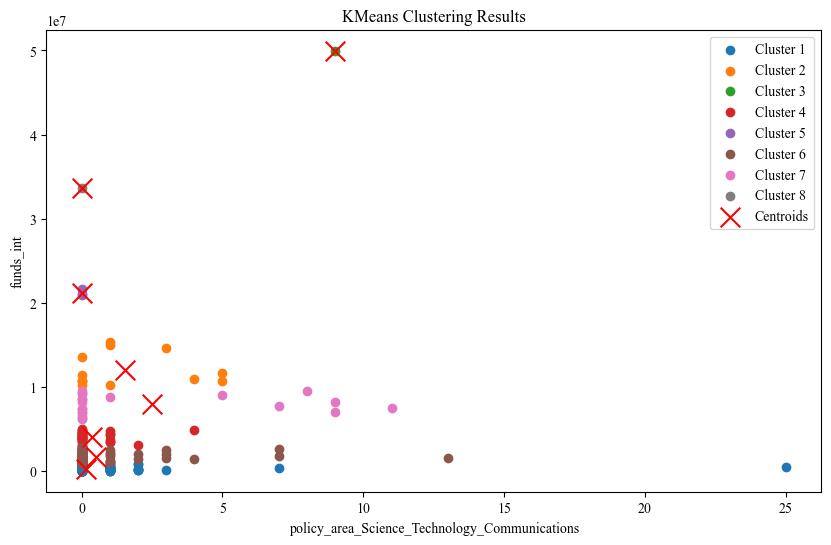

In [89]:

# Add a new column to the DataFrame with the cluster labels
clustering_by_firm_clustering['Cluster'] = kmeans.labels_

# Visualize the clustering results
plt.figure(figsize=(10, 6))

for cluster in range(num_clusters):
    cluster_data = clustering_by_firm_clustering[clustering_by_firm_clustering['Cluster'] == cluster]
    plt.scatter(cluster_data['policy_area_Science_Technology_Communications'], 
                cluster_data['funds_int'], label=f'Cluster {cluster + 1}')

plt.scatter(kmeans.cluster_centers_[:, 34], kmeans.cluster_centers_[:, 41], marker='x', s=200, c='red', label='Centroids')

plt.title('KMeans Clustering Results')
plt.xlabel('policy_area_Science_Technology_Communications')
plt.ylabel('funds_int')
plt.legend()
plt.show();

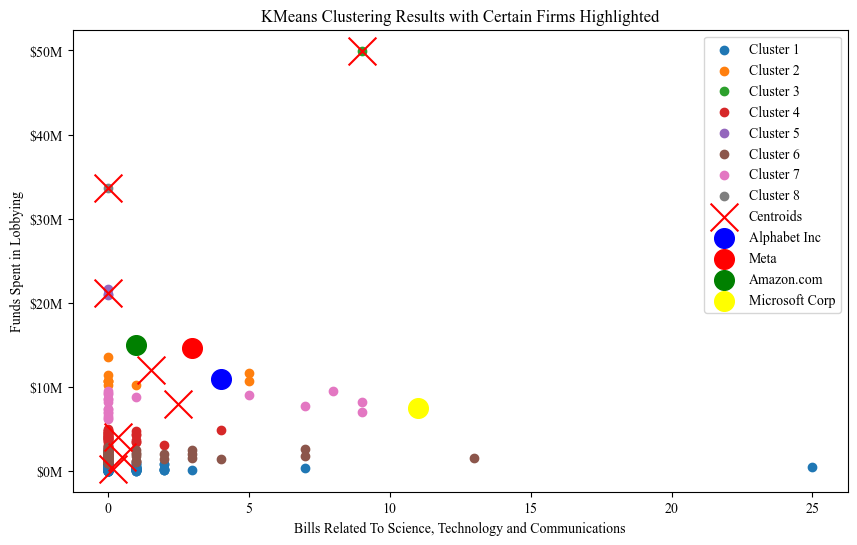

In [102]:

# Add a new column to the DataFrame with the cluster labels
clustering_by_firm_clustering['Cluster'] = kmeans.labels_

# Visualize the clustering results
plt.figure(figsize=(10, 6))

# Getting regression on funds and 
def currency_formatter(x, pos):
    return f"${int(x/1000000):,}M"


for cluster in range(num_clusters):
    cluster_data = clustering_by_firm_clustering[clustering_by_firm_clustering['Cluster'] == cluster]
    plt.scatter(cluster_data['policy_area_Science_Technology_Communications'], 
                cluster_data['funds_int'], label=f'Cluster {cluster + 1}')

plt.scatter(kmeans.cluster_centers_[:, 34], kmeans.cluster_centers_[:, 41], marker='x', s=400, c='red', label='Centroids')
plt.scatter(clustering_by_firm_df["policy_area_Science_Technology_Communications"][clustering_by_firm_df.Organization == "Alphabet Inc"], 
            clustering_by_firm_df["funds_int"][clustering_by_firm_df.Organization == "Alphabet Inc"], 
            marker='o', s=200, c='blue', label='Alphabet Inc')

plt.scatter(clustering_by_firm_df["policy_area_Science_Technology_Communications"][clustering_by_firm_df.Organization == "Meta"], 
            clustering_by_firm_df["funds_int"][clustering_by_firm_df.Organization == "Meta"], 
            marker='o', s=200, c='red', label='Meta')

plt.scatter(clustering_by_firm_df["policy_area_Science_Technology_Communications"][clustering_by_firm_df.Organization == "Amazon.com"], 
            clustering_by_firm_df["funds_int"][clustering_by_firm_df.Organization == "Amazon.com"], 
            marker='o', s=200, c='green', label='Amazon.com')


plt.scatter(clustering_by_firm_df["policy_area_Science_Technology_Communications"][clustering_by_firm_df.Organization == "Microsoft Corp"], 
            clustering_by_firm_df["funds_int"][clustering_by_firm_df.Organization == "Microsoft Corp"], 
            marker='o', s=200, c='yellow', label='Microsoft Corp')

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.title('KMeans Clustering Results with Certain Firms Highlighted')
plt.xlabel('Bills Related To Science, Technology and Communications')
plt.ylabel('Funds Spent in Lobbying')
plt.legend()
plt.show();

In [91]:
# Create a new DataFrame with the 'Cluster' column inserted in the second position
cluster_column = pd.Series(kmeans.labels_, name='Cluster')
clustering_by_firm_df_modified = pd.concat([clustering_by_firm_df.iloc[:, :1], cluster_column, clustering_by_firm_df.iloc[:, 1:]], axis=1)

clustering_by_firm_df_modified[clustering_by_firm_df_modified["Organization"] == "Amazon.com"]
clustering_by_firm_df_modified[clustering_by_firm_df_modified["Organization"] == "Alphabet Inc"]
clustering_by_firm_df_modified[clustering_by_firm_df_modified["Organization"] == "Microsoft Corp"]
clustering_by_firm_df_modified[clustering_by_firm_df_modified["Organization"] == "Meta"]

,Organization,Cluster,issue_text_len,HCONRES,HJRES,HR,S,SRES,Sponsor_D,Sponsor_I,Sponsor_R,policy_area_Agriculture_and_Food,policy_area_Animals,policy_area_Armed_Forces_and_National_Security,policy_area_Arts_Culture_Religion,policy_area_Civil_Rights_and_Liberties_Minority_Issues,policy_area_Commerce,policy_area_Congress,policy_area_Crime_and_Law_Enforcement,policy_area_Economics_and_Public_Finance,policy_area_Education,policy_area_Emergency_Management,policy_area_Energy,policy_area_Environmental_Protection,policy_area_Families,policy_area_Finance_and_Financial_Sector,policy_area_Foreign_Trade_and_International_Finance,policy_area_Government_Operations_and_Politics,policy_area_Health,policy_area_Housing_and_Community_Development,policy_area_Immigration,policy_area_International_Affairs,policy_area_Labor_and_Employment,policy_area_Law,policy_area_Native_Americans,policy_area_Public_Lands_and_Natural_Resources,policy_area_Science_Technology_Communications,policy_area_Social_Welfare,policy_area_Sports_and_Recreation,policy_area_Taxation,policy_area_Transportation_and_Public_Works,policy_area_Water_Resources_Development,policy_area_policyArea,Company,funds_int
125,Amazon.com,3.0,2583.0,0,0,10,8,0,8,1,9,0,0,0,0,0,3,0,0,0,1,0,0,0,0,2,0,2,3,0,2,0,0,0,0,0,1,1,0,2,1,0,0,Amazon.com,14970000.0


,Organization,Cluster,issue_text_len,HCONRES,HJRES,HR,S,SRES,Sponsor_D,Sponsor_I,Sponsor_R,policy_area_Agriculture_and_Food,policy_area_Animals,policy_area_Armed_Forces_and_National_Security,policy_area_Arts_Culture_Religion,policy_area_Civil_Rights_and_Liberties_Minority_Issues,policy_area_Commerce,policy_area_Congress,policy_area_Crime_and_Law_Enforcement,policy_area_Economics_and_Public_Finance,policy_area_Education,policy_area_Emergency_Management,policy_area_Energy,policy_area_Environmental_Protection,policy_area_Families,policy_area_Finance_and_Financial_Sector,policy_area_Foreign_Trade_and_International_Finance,policy_area_Government_Operations_and_Politics,policy_area_Health,policy_area_Housing_and_Community_Development,policy_area_Immigration,policy_area_International_Affairs,policy_area_Labor_and_Employment,policy_area_Law,policy_area_Native_Americans,policy_area_Public_Lands_and_Natural_Resources,policy_area_Science_Technology_Communications,policy_area_Social_Welfare,policy_area_Sports_and_Recreation,policy_area_Taxation,policy_area_Transportation_and_Public_Works,policy_area_Water_Resources_Development,policy_area_policyArea,Company,funds_int
120,Alphabet Inc,0.0,4791.0,0,0,8,11,0,8,0,11,0,0,0,0,0,6,0,4,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,Alphabet Inc,10940000.0


,Organization,Cluster,issue_text_len,HCONRES,HJRES,HR,S,SRES,Sponsor_D,Sponsor_I,Sponsor_R,policy_area_Agriculture_and_Food,policy_area_Animals,policy_area_Armed_Forces_and_National_Security,policy_area_Arts_Culture_Religion,policy_area_Civil_Rights_and_Liberties_Minority_Issues,policy_area_Commerce,policy_area_Congress,policy_area_Crime_and_Law_Enforcement,policy_area_Economics_and_Public_Finance,policy_area_Education,policy_area_Emergency_Management,policy_area_Energy,policy_area_Environmental_Protection,policy_area_Families,policy_area_Finance_and_Financial_Sector,policy_area_Foreign_Trade_and_International_Finance,policy_area_Government_Operations_and_Politics,policy_area_Health,policy_area_Housing_and_Community_Development,policy_area_Immigration,policy_area_International_Affairs,policy_area_Labor_and_Employment,policy_area_Law,policy_area_Native_Americans,policy_area_Public_Lands_and_Natural_Resources,policy_area_Science_Technology_Communications,policy_area_Social_Welfare,policy_area_Sports_and_Recreation,policy_area_Taxation,policy_area_Transportation_and_Public_Works,policy_area_Water_Resources_Development,policy_area_policyArea,Company,funds_int
1449,Microsoft Corp,NaN,6573.0,0,0,10,17,0,21,0,6,0,0,0,0,0,8,0,4,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,11,0,0,0,0,0,1,Microsoft Corp,7447616.0


,Organization,Cluster,issue_text_len,HCONRES,HJRES,HR,S,SRES,Sponsor_D,Sponsor_I,Sponsor_R,policy_area_Agriculture_and_Food,policy_area_Animals,policy_area_Armed_Forces_and_National_Security,policy_area_Arts_Culture_Religion,policy_area_Civil_Rights_and_Liberties_Minority_Issues,policy_area_Commerce,policy_area_Congress,policy_area_Crime_and_Law_Enforcement,policy_area_Economics_and_Public_Finance,policy_area_Education,policy_area_Emergency_Management,policy_area_Energy,policy_area_Environmental_Protection,policy_area_Families,policy_area_Finance_and_Financial_Sector,policy_area_Foreign_Trade_and_International_Finance,policy_area_Government_Operations_and_Politics,policy_area_Health,policy_area_Housing_and_Community_Development,policy_area_Immigration,policy_area_International_Affairs,policy_area_Labor_and_Employment,policy_area_Law,policy_area_Native_Americans,policy_area_Public_Lands_and_Natural_Resources,policy_area_Science_Technology_Communications,policy_area_Social_Welfare,policy_area_Sports_and_Recreation,policy_area_Taxation,policy_area_Transportation_and_Public_Works,policy_area_Water_Resources_Development,policy_area_policyArea,Company,funds_int
1436,Meta,NaN,4386.0,0,0,3,8,0,6,0,5,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,Meta,14640000.0


In [92]:

# Get the centroid values
centroids = kmeans.cluster_centers_

# Create a DataFrame with centroid values and use column names from clustering_by_firm_df
centroid_df = pd.DataFrame(centroids, columns=clustering_by_firm_clustering.columns[:-1])  # Exclude the 'Cluster' column

# Add a 'Cluster' column to the centroid DataFrame
centroid_df['Cluster'] = range(0, num_clusters)

# Print or use the centroid DataFrame
print("Centroid Values:")
centroid_df

Centroid Values:


,issue_text_len,HCONRES,HJRES,HR,S,SRES,Sponsor_D,Sponsor_I,Sponsor_R,policy_area_Agriculture_and_Food,policy_area_Animals,policy_area_Armed_Forces_and_National_Security,policy_area_Arts_Culture_Religion,policy_area_Civil_Rights_and_Liberties_Minority_Issues,policy_area_Commerce,policy_area_Congress,policy_area_Crime_and_Law_Enforcement,policy_area_Economics_and_Public_Finance,policy_area_Education,policy_area_Emergency_Management,policy_area_Energy,policy_area_Environmental_Protection,policy_area_Families,policy_area_Finance_and_Financial_Sector,policy_area_Foreign_Trade_and_International_Finance,policy_area_Government_Operations_and_Politics,policy_area_Health,policy_area_Housing_and_Community_Development,policy_area_Immigration,policy_area_International_Affairs,policy_area_Labor_and_Employment,policy_area_Law,policy_area_Native_Americans,policy_area_Public_Lands_and_Natural_Resources,policy_area_Science_Technology_Communications,policy_area_Social_Welfare,policy_area_Sports_and_Recreation,policy_area_Taxation,policy_area_Transportation_and_Public_Works,policy_area_Water_Resources_Development,policy_area_policyArea,funds_int,Cluster
0,8953.980100,8.457711e-02,2.114428e-01,7.186567,4.121891,7.213930e-02,6.054726,0.099502,5.522388,0.592040,6.965174e-02,0.883085,1.492537e-02,0.094527,0.288557,8.457711e-02,1.067164,0.109453,0.532338,0.084577,0.256219,0.412935,0.057214,2.885572e-01,0.084577,0.778607,2.455224,0.099502,0.380597,0.385572,4.925373e-01,0.144279,2.487562e-02,0.320896,0.176617,0.228856,1.492537e-02,0.664179,3.830846e-01,0.067164,0.139303,2.488586e+05,0
1,19240.230769,-2.775558e-17,2.775558e-17,14.076923,11.538462,0.000000e+00,10.461538,0.538462,14.615385,0.153846,-1.387779e-17,1.153846,3.469447e-18,0.000000,2.230769,-1.387779e-17,1.076923,0.230769,0.461538,0.000000,0.076923,0.153846,0.000000,3.076923e-01,0.615385,0.846154,12.769231,0.000000,0.307692,0.230769,3.076923e-01,0.153846,0.000000e+00,0.000000,1.538462,1.230769,1.734723e-18,0.846154,6.153846e-01,0.000000,0.307692,1.195656e+07,1
2,305955.000000,0.000000e+00,2.000000e+00,104.000000,75.000000,0.000000e+00,77.000000,0.000000,104.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,12.000000,0.000000e+00,4.000000,0.000000,8.000000,2.000000,3.000000,6.000000,0.000000,1.600000e+01,13.000000,10.000000,9.000000,0.000000,39.000000,5.000000,1.200000e+01,11.000000,0.000000e+00,1.000000,9.000000,1.000000,0.000000e+00,11.000000,6.000000e+00,0.000000,1.000000,4.997000e+07,2
3,15847.272727,3.030303e-02,3.030303e-01,13.939394,8.030303,3.030303e-02,9.363636,0.303030,12.666667,0.212121,6.060606e-02,0.212121,-3.469447e-18,0.090909,0.848485,3.030303e-02,0.818182,0.242424,0.515152,0.272727,0.575758,0.575758,0.030303,3.060606e+00,0.272727,0.545455,5.060606,0.060606,0.242424,0.212121,1.424242e+00,0.454545,3.030303e-02,0.242424,0.363636,0.212121,-1.734723e-18,1.848485,3.666667e+00,0.030303,0.121212,4.012863e+06,3
4,65162.000000,0.000000e+00,0.000000e+00,35.000000,18.333333,1.387779e-17,22.000000,0.666667,30.666667,0.333333,3.333333e-01,1.333333,3.333333e-01,0.333333,2.333333,0.000000e+00,0.666667,0.333333,0.666667,0.000000,0.333333,0.000000,0.000000,1.110223e-16,0.000000,0.333333,42.333333,0.000000,0.666667,0.000000,1.110223e-16,0.333333,3.469447e-18,1.000000,0.000000,0.000000,0.000000e+00,1.333333,1.110223e-16,0.000000,0.333333,2.120225e+07,4
5,11909.260000,7.000000e-02,3.600000e-01,12.040000,6.980000,6.000000e-02,9.690000,0.320000,9.500000,0.740000,4.000000e-02,0.530000,5.000000e-02,0.100000,0.590000,2.000000e-02,2.280000,0.150000,1.190000,0.320000,0.620000,0.590000,0.100000,1.140000e+00,0.170000,0.670000,3.590000,0.110000,0.440000,0.390000,1.210000e+00,0.120000,2.000000e-02,0.300000,0.510000,0.180000,-6.938894e-18,1.590000,1.510000e+00,0.030000,0.210000,1.614061e+06,5
6,10107.700000,1.500000e-01,1.500000e-01,10.800000,8.100000,0.000000e+00,7.250000,0.300000,11.650000,0.150000,1.000000e-01,0.150000,0.000000e+00,0.000000,1.300000,5.000000e-02,0.950000,0.200000,0.150000,0.250000,

In [93]:


columns_to_drop = ['issue_text_len', 'Organization', 'Company']
clustering_by_firm_pca = clustering_by_firm_df.drop(columns=columns_to_drop)
clustering_by_firm_pca = clustering_by_firm_pca.dropna(subset=['funds_int'])
clustering_by_firm_pca.head()
clustering_by_firm_pca.shape

,HCONRES,HJRES,HR,S,SRES,Sponsor_D,Sponsor_I,Sponsor_R,policy_area_Agriculture_and_Food,policy_area_Animals,policy_area_Armed_Forces_and_National_Security,policy_area_Arts_Culture_Religion,policy_area_Civil_Rights_and_Liberties_Minority_Issues,policy_area_Commerce,policy_area_Congress,policy_area_Crime_and_Law_Enforcement,policy_area_Economics_and_Public_Finance,policy_area_Education,policy_area_Emergency_Management,policy_area_Energy,policy_area_Environmental_Protection,policy_area_Families,policy_area_Finance_and_Financial_Sector,policy_area_Foreign_Trade_and_International_Finance,policy_area_Government_Operations_and_Politics,policy_area_Health,policy_area_Housing_and_Community_Development,policy_area_Immigration,policy_area_International_Affairs,policy_area_Labor_and_Employment,policy_area_Law,policy_area_Native_Americans,policy_area_Public_Lands_and_Natural_Resources,policy_area_Science_Technology_Communications,policy_area_Social_Welfare,policy_area_Sports_and_Recreation,policy_area_Taxation,policy_area_Transportation_and_Public_Works,policy_area_Water_Resources_Development,policy_area_policyArea,funds_int
5,0,0,31,21,0,33,1,18,1,0,8,0,0,0,0,1,0,1,0,0,0,0,2,0,0,19,0,0,0,3,1,0,0,0,14,0,0,2,0,0,11390000.0
11,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120000.0
13,0,0,2,1,0,1,0,2,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,338000.0
19,0,1,30,19,0,33,1,16,0,0,0,0,0,1,0,0,1,1,0,3,2,1,3,0,2,7,0,0,1,10,0,0,0,0,5,0,4,9,0,0,3890000.0
22,0,0,7,7,0,6,0,8,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,1,0,0,0,0,0,0,0,0,2,0,1,75000.0


(573, 41)

In [94]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named 'data' with numerical features
# Replace 'data' with the actual name of your DataFrame

# Step 1: Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(clustering_by_firm_pca)


# Step 2: Perform PCA with the desired number of components
n_components = 5
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_standardized)

# Get the loadings (coefficients) for each principal component
loadings = pca.components_

# Create a DataFrame with loadings
loadings_df = pd.DataFrame(data=loadings.T, columns=[f'PC{i}' for i in range(1, n_components + 1)], index=clustering_by_firm_pca.columns)

# Print or use the DataFrame with loadings
print("Loadings (Coefficients) for Each Original Feature:")


loadings_df.sort_values(by = "PC1", ascending=False).head(n = 4)
loadings_df.sort_values(by = "PC2", ascending=False).head(n = 4)
loadings_df.sort_values(by = "PC3", ascending=False).head(n = 4)
loadings_df.sort_values(by = "PC4", ascending=False).head(n = 4)
loadings_df.sort_values(by = "PC5", ascending=False).head(n = 4)

Loadings (Coefficients) for Each Original Feature:


,PC1,PC2,PC3,PC4,PC5
HR,0.305795,0.061069,-0.055522,0.116937,0.050896
Sponsor_R,0.295543,0.070399,0.002367,-0.019919,-0.036820
S,0.289923,0.146633,-0.095671,0.125819,0.008031
Sponsor_D,0.256877,0.088762,-0.111908,0.248029,0.071837


,PC1,PC2,PC3,PC4,PC5
policy_area_Commerce,0.121459,0.290557,-0.228576,0.052661,-0.050179
funds_int,0.096242,0.283838,-0.227696,-0.147377,-0.162267
policy_area_Foreign_Trade_and_International_Finance,0.103296,0.250726,-0.122017,-0.251307,-0.271603
policy_area_Emergency_Management,0.076072,0.227777,-0.008774,0.128378,0.300770


,PC1,PC2,PC3,PC4,PC5
policy_area_Public_Lands_and_Natural_Resources,0.065632,0.211111,0.401909,0.095985,0.017096
policy_area_Animals,0.030827,0.166438,0.401219,0.065062,-0.052987
policy_area_Environmental_Protection,0.095721,0.222275,0.392421,-0.005483,-0.044361
policy_area_Energy,0.065097,0.164295,0.335089,-0.052117,-0.138853


,PC1,PC2,PC3,PC4,PC5
policy_area_Armed_Forces_and_National_Security,0.091420,0.009854,-0.104268,0.320874,0.154455
policy_area_Civil_Rights_and_Liberties_Minority_Issues,0.114276,-0.094498,-0.030678,0.250458,-0.346428
Sponsor_D,0.256877,0.088762,-0.111908,0.248029,0.071837
policy_area_Sports_and_Recreation,0.033525,-0.083384,0.016150,0.227656,-0.293787


,PC1,PC2,PC3,PC4,PC5
policy_area_Emergency_Management,0.076072,0.227777,-0.008774,0.128378,0.300770
policy_area_Housing_and_Community_Development,0.044395,0.091903,-0.054321,0.217928,0.238545
Sponsor_I,0.197313,-0.169269,-0.006083,-0.032565,0.178434
policy_area_Social_Welfare,0.164738,-0.162142,-0.029210,0.010450,0.168318


In [95]:

# Get the total variance explained by all components
total_variance_explained = pca.explained_variance_ratio_.sum()
print(f"Total Variance Explained: {total_variance_explained:.4f}")

# Get the additional variance explained by each additional component
additional_variance_explained = [pca.explained_variance_ratio_[:i].sum() for i in range(1, n_components + 1)]

# Create a DataFrame with the results
variance_explained_df = pd.DataFrame({
    'Component': range(1, n_components + 1),
    'Additional Variance Explained': additional_variance_explained
})

# Print or use the DataFrame with variance explained
print("\nAdditional Variance Explained by Each Additional Component:")
print(variance_explained_df)

Total Variance Explained: 0.4531

Additional Variance Explained by Each Additional Component:
   Component  Additional Variance Explained
0          1                       0.229399
1          2                       0.301559
2          3                       0.362696
3          4                       0.412205
4          5                       0.453053


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Additional Variance Explained by Each Additional PCA Component')

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Additional Variance Explained')

([<matplotlib.axis.XTick at 0x224957cc460>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

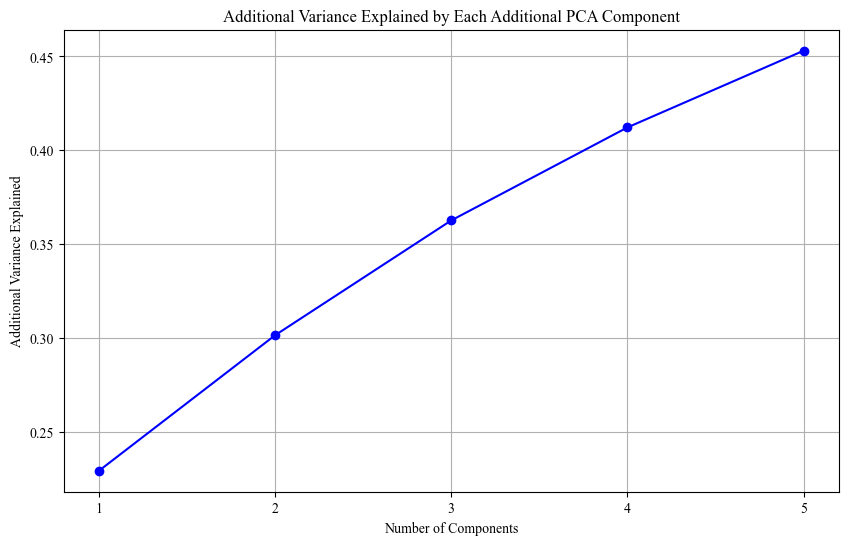

In [96]:

# Plot the additional variance explained in a line graph
plt.figure(figsize=(10, 6))
plt.plot(variance_explained_df['Component'], variance_explained_df['Additional Variance Explained'], marker='o', linestyle='-', color='b')
plt.title('Additional Variance Explained by Each Additional PCA Component')
plt.xlabel('Number of Components')
plt.ylabel('Additional Variance Explained')
plt.xticks(range(1, n_components + 1))  # Set x-axis ticks to integers

plt.grid(True)
plt.show()